# Logistic Regression

## Customer churn to bank

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
plt.style.use(['seaborn-bright','dark_background'])

In [4]:
data = pd.read_csv("churn_prediction_simple.csv")

In [5]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [7]:
data.describe()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,...,2.206700e+04,2.206700e+04,22067.000000,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,22067.000000
mean,15115.161372,2547.069334,47.931345,0.391807,0.377487,0.772420,800.318575,2.211991,874.440975,66.934790,...,7.222013e+03,7.181977e+03,6694.966494,3.943065e+03,3.781366e+03,4.070565e+03,3.720333e+03,7.165418e+03,7.182148e+03,0.193683
std,8737.384035,1598.675520,16.393352,0.488165,1.044629,1.033849,431.454448,0.669556,904.244526,84.133427,...,2.105071e+04,1.927121e+04,17101.802052,8.661750e+04,3.254151e+04,5.726446e+04,2.517514e+04,1.959007e+04,2.097682e+04,0.395192
min,1.000000,180.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-3.145380e+03,1.428690e+03,-16506.100000,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7522.500000,1321.000000,36.000000,0.000000,0.000000,0.000000,409.000000,2.000000,159.000000,11.000000,...,1.906485e+03,2.209835e+03,1817.980000,3.600000e-01,3.700000e-01,4.700000e-01,4.900000e-01,2.029970e+03,2.090665e+03,0.000000
50%,15120.000000,2202.000000,46.000000,0.000000,0.000000,0.000000,848.000000,2.000000,531.000000,28.000000,...,3.426740e+03,3.592880e+03,3380.690000,1.130000e+00,6.440000e+00,2.147300e+02,2.285000e+02,3.501740e+03,3.508160e+03,0.000000
75%,22685.500000,3370.000000,60.000000,1.000000,0.000000,2.000000,1096.000000,3.000000,1374.000000,90.000000,...,6.826095e+03,6.819235e+03,6628.750000,9.937800e+02,1.129115e+03,1.579220e+03,1.643175e+03,6.858385e+03,6.779355e+03,0.000000
max,30301.000000,11353.000000,90.000000,1.000000,52.000000,4.000000,1649.000000,3.000000,4782.000000,365.000000,...,1.001124e+06,1.192704e+06,856596.510000,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,1.074625e+06,1.326487e+06,1.000000


In [8]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

### drop missing value

In [9]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [10]:
## checking the dataset distribution

data["churn"].value_counts()/len(data)


0    0.806317
1    0.193683
Name: churn, dtype: float64

In [11]:
## separting dependent and independent variables

X = data.drop(columns=['churn','customer_id'])
Y = data["churn"]

In [25]:
## Scaling the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [28]:
## spliting the dataset

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(scaled_X, Y, train_size = 0.80)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [30]:
## Model building, predictions and odds ratio

from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight="balanced")

In [32]:
classifier.fit(xtrain,ytrain)
predicted_values = classifier.predict(xtest)
predicted_probabilities = classifier.predict_proba(xtest)

In [33]:
predicted_values

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [34]:
predicted_probabilities, predicted_probabilities.shape

(array([[0.67404155, 0.32595845],
        [0.79356874, 0.20643126],
        [0.39256431, 0.60743569],
        ...,
        [0.4435273 , 0.5564727 ],
        [0.46846809, 0.53153191],
        [0.61226463, 0.38773537]]),
 (4414, 2))

In [35]:
classifier.score(xtest, ytest)

0.7276846397825102

In [36]:
## calculating the precision score

from sklearn.metrics import precision_score
Precision = precision_score(ytest, predicted_values)
Precision

0.36766712141882674

In [37]:
## calculating the precision score

from sklearn.metrics import recall_score
Precision = recall_score(ytest, predicted_values)
Precision

0.6621621621621622

In [38]:
## f1-score

from sklearn.metrics import f1_score
F1 = f1_score(ytest, predicted_values)
F1

0.4728070175438597

In [39]:
## calculating all at once

from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support = PRF_summary(ytest, predicted_values)

In [40]:
precision

array([0.90671642, 0.36766712])

In [41]:
recall

array([0.7425    , 0.66216216])

In [42]:
f1

array([0.8164325 , 0.47280702])

### Precision-Recall Curve

In [43]:
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(ytest,predicted_probabilities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((4412,), (4412,), (4411,))

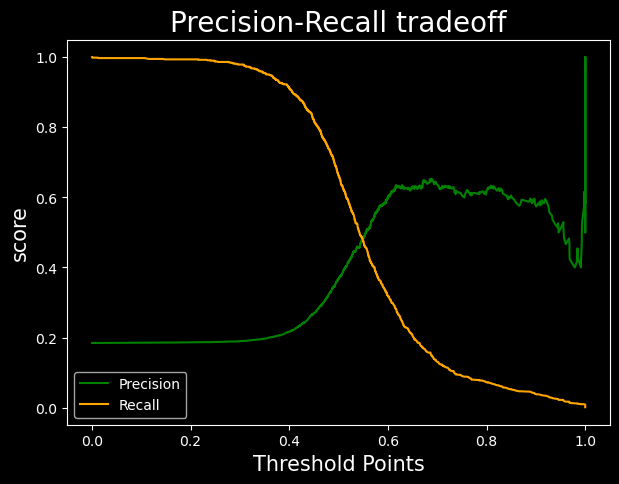

In [46]:
plt.figure(figsize=(7,5), dpi=100)
plt.plot(threshold_points, precision_points[:-1], color = "green", label = "Precision")
plt.plot(threshold_points, recall_points[:-1], color = "orange", label = "Recall")
plt.xlabel("Threshold Points", fontsize=15)
plt.ylabel('score',fontsize=15)
plt.title("Precision-Recall tradeoff",fontsize=20)
plt.legend()

### AUC - ROC curve

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(ytest,predicted_probabilities[:,1])

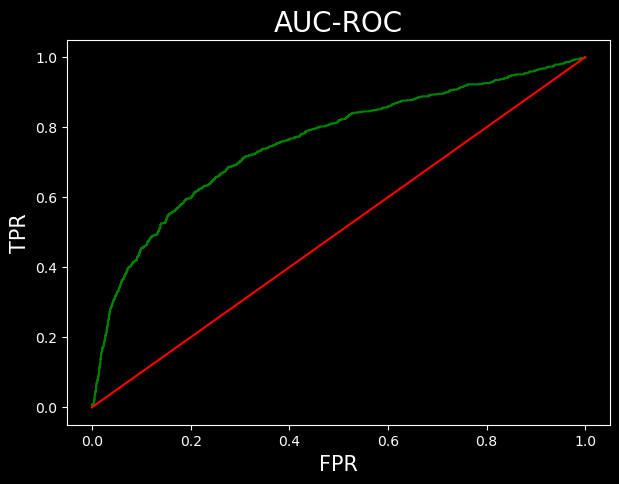

0.75624453999454

In [48]:
plt.figure(figsize=(7,5), dpi=100)
plt.plot(fpr,tpr,color = "green")
plt.plot([0,1],[0,1],label="baseline",color = "red")
plt.xlabel("FPR", fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.title("AUC-ROC",fontsize=20)
plt.show()
roc_auc_score(ytest,predicted_probabilities[:,1])

### Coefficient Plot

In [52]:
## arranging the data

c = classifier.coef_.reshape(-1)
x = X.columns

coeff_plot = pd.DataFrame({
    "coefficients":c,
    "variable":x
})

## sorting the values

coeff_plot = coeff_plot.sort_values(by="coefficients")
coeff_plot.head()

,coefficients,variable
9,-1.928405,current_balance
13,-0.223412,current_month_credit
0,-0.176485,vintage
8,-0.112721,days_since_last_transaction
14,-0.109280,previous_month_credit


Text(0.5, 1.0, 'Coefficinets plot')

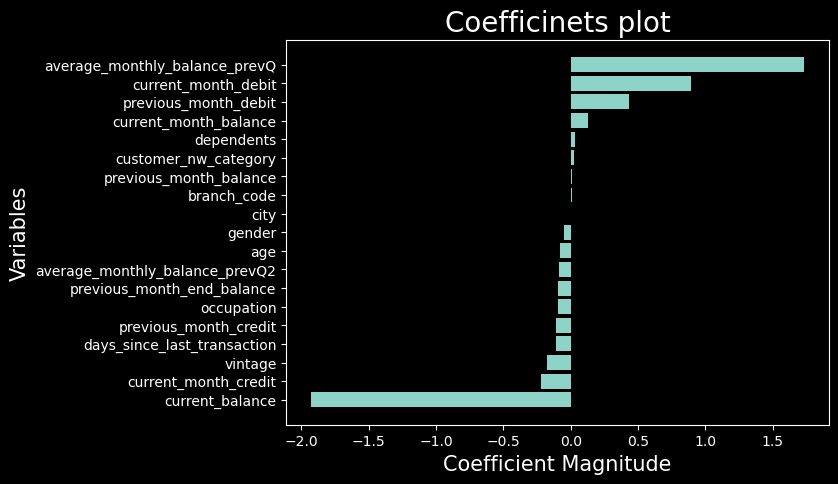

In [54]:
plt.figure(figsize=(7,5), dpi=100)
plt.barh(coeff_plot["variable"], coeff_plot["coefficients"])
plt.xlabel("Coefficient Magnitude", fontsize=15)
plt.ylabel('Variables',fontsize=15)
plt.title("Coefficinets plot",fontsize=20)